In [5]:
# import the required libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [58]:
train_Path = os.path.join(os.getcwd(),'archive', 'Train')
test_Path = os.path.join(os.getcwd(),'archive', 'Test')
train_Path

'D:\\Anaconda_en_DiscoD\\car_plate_detection2\\TFODCourse\\archive\\Train'

In [32]:
# Paths
#train_Path = '../input/car-brand-images-dataset/Train'
#test_Path = '../input/car-brand-images-dataset/Test'
# Set Resize variable
IMAGE_SIZE = [224, 224] # This is my desired image size... and also ResNet50 accepts image of 224*224.
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

In [33]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [34]:
for layer in resnet.layers:
    layer.trainable = False
    
# This will let us use the default weights used by the imagenet. 
train_Path

'D:\\Anaconda_en_DiscoD\\car_plate_detection2\\TFODCourse\\archive\\Train'

In [42]:
# Usefule for getting number of output classes.
#folders = glob('../input/car-brand-images-dataset/Train/*')
import glob
import os
folder=glob.glob('D:\\Anaconda_en_DiscoD\\car_plate_detection2\\TFODCourse\\archive\\Train\*')
folder

['D:\\Anaconda_en_DiscoD\\car_plate_detection2\\TFODCourse\\archive\\Train\\audi',
 'D:\\Anaconda_en_DiscoD\\car_plate_detection2\\TFODCourse\\archive\\Train\\lamborghini',
 'D:\\Anaconda_en_DiscoD\\car_plate_detection2\\TFODCourse\\archive\\Train\\mercedes']

In [43]:
car_label = ['mercedes', 'audi', 'lamborghini']
# Set the flatten layer.
x = Flatten() (resnet.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

# Create a model Object
model = Model(inputs = resnet.input, outputs = prediction)
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [44]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [17]:
from keras.preprocessing import image

In [45]:

# Use the Image Data Generator


train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 64 images belonging to 3 classes.


In [46]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 58 images belonging to 3 classes.


In [47]:
# Fir the model.

history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

C:\Users\javie\AppData\Local\Continuum\anaconda3\envs\tfod3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 25s 13s/step - loss: 5.0484 - accuracy: 0.2969 - val_loss: 7.7216 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 14s 10s/step - loss: 8.0047 - accuracy: 0.3906 - val_loss: 1.2193 - val_accuracy: 0.3793
Epoch 3/50
2/2 [==============================] - 14s 10s/step - loss: 2.7335 - accuracy: 0.4531 - val_loss: 4.6507 - val_accuracy: 0.3621
Epoch 4/50
2/2 [==============================] - 14s 10s/step - loss: 4.8202 - accuracy: 0.4375 - val_loss: 4.2096 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 14s 10s/step - loss: 3.1013 - accuracy: 0.5312 - val_loss: 2.2751 - val_accuracy: 0.3448
Epoch 6/50
2/2 [==============================] - 14s 10s/step - loss: 2.6523 - accuracy: 0.4531 - val_loss: 4.4049 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 14s 10s/step - loss: 2.6088 - accuracy: 0.4688 - val_loss: 2.9271 - val_accuracy: 0.1724
Epoch 8/50
2/2 [===========

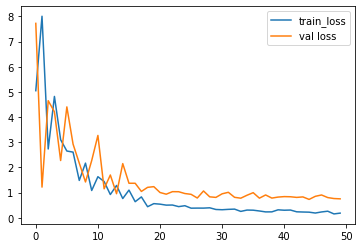

In [48]:
# Plot the Loss

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

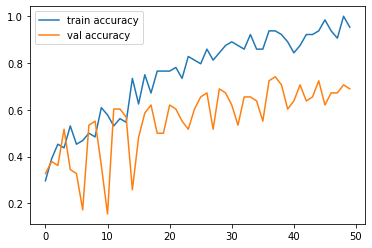

In [49]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')

In [50]:
# Save it as a h5 file
from tensorflow.keras.models import load_model

model.save('car_brand_clf_resnet50.h5')

In [51]:
prediction = model.predict(test_set)

In [53]:
prediction

array([[1.74953379e-02, 7.79873878e-02, 9.04517293e-01],
       [4.33719963e-01, 4.10367846e-02, 5.25243282e-01],
       [4.20952012e-04, 2.72347368e-02, 9.72344339e-01],
       [1.39539793e-01, 6.80065572e-01, 1.80394694e-01],
       [9.93650258e-01, 3.19652585e-03, 3.15324543e-03],
       [8.16608846e-01, 9.58640575e-02, 8.75270367e-02],
       [2.59189066e-02, 5.60278306e-04, 9.73520815e-01],
       [1.93187907e-01, 6.07103944e-01, 1.99708119e-01],
       [1.65715197e-03, 5.75787574e-03, 9.92585003e-01],
       [3.36000830e-01, 4.82090443e-01, 1.81908756e-01],
       [1.31529861e-03, 7.80783176e-01, 2.17901528e-01],
       [2.21648831e-02, 9.53826368e-01, 2.40088012e-02],
       [1.26211978e-02, 9.20342088e-01, 6.70366883e-02],
       [4.02434431e-02, 8.75683308e-01, 8.40733275e-02],
       [6.40024692e-02, 7.03707993e-01, 2.32289538e-01],
       [4.54339059e-03, 9.84533906e-01, 1.09227421e-02],
       [1.01630390e-01, 8.45382690e-01, 5.29869683e-02],
       [1.89190939e-01, 2.55640

In [76]:
unseen_data_path

'D:\\Anaconda_en_DiscoD\\car_plate_detection2\\TFODCourse\\Tensorflow\\workspace\\images\\usedtest'

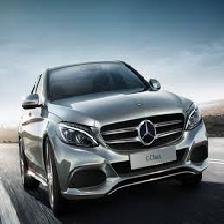

In [78]:
unseen_data_path = os.path.join(os.getcwd(),'Tensorflow','workspace','images', 'usedtest')
# img = image.load_img('../input/unseen-data/audi_1.jpg', target_size = IMAGE_SIZE)D:\Anaconda_en_DiscoD\car_plate_detection2\TFODCourse\Tensorflow\workspace\images\usedtest

img = image.load_img(unseen_data_path + '\\45.jpg', target_size = IMAGE_SIZE)
img

In [79]:
x = image.img_to_array(img)


In [80]:
x = x / 255
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
x.shape, img_data.shape
((1, 224, 224, 3), (1, 224, 224, 3))
model.predict(img_data)

array([[6.8300334e-04, 1.0283068e-04, 9.9921417e-01]], dtype=float32)

In [81]:
a = np.argmax(model.predict(img_data), axis = 1)
a

array([2], dtype=int64)

In [82]:
def unseen_data_test(path, image_name, model):
    img = image.load_img(path + image_name, target_size = IMAGE_SIZE)
    print('Original Image')
#     print(img)
    plt.imshow(img)
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis = 0)
    img_data = preprocess_input(x)
    a = np.argmax(model.predict(img_data), axis = 1)
    
    if a == 0:
        print("Its Audi")
    elif a == 1:
        print("Its Mercedes")
    else:
        print("Its Lamorghini ")

Original Image
Its Lamorghini 


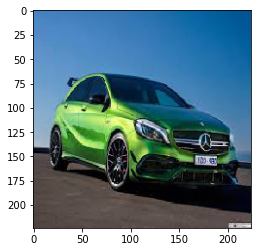

In [85]:
unseen_data_test(unseen_data_path, '\\40.jpg', model)

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [7]:
import glob
import os
files=glob.glob('D:\\Anaconda_en_DiscoD\\car_plate_detection2\\TFODCourse\\Tensorflow\\workspace\\images\\train2\*.jpg')
len(files)

2224

In [ ]:
kaggle kernels output kerneler/starter-car-brand-images-dataset-c4c024ef-1 -p /path/to/dest

In [ ]:
for i,pos in tqdm(enumerate(df3.index.tolist())):

    image = Image.open(files[pos])
    new_image = image.resize((6000, 4000))
    new_image.save(files[pos],dpi=(300, 300))